# Financial Data Statistics

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in dataset we downloaded earlier
data = pd.read_csv('./data/all_stocks_5yr.csv', parse_dates=True)

In [3]:
# look at starbucks
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


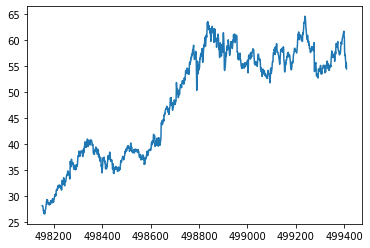

In [4]:
# plot this data
sbux['close'].plot()
plt.show()

In [5]:
# create column of previous close - the last trading day close price
sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
# view the data to confirm
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
# calculate the return
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [8]:
# view the data to confirm
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [9]:
# can calculate return directly using pct_change function
sbux['return2'] = sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


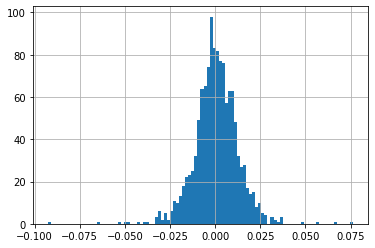

In [10]:
# create histogram of returns
sbux['return'].hist(bins=100)
plt.show()

In [11]:
# calc some statistics on our returns - sample mean and var
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [12]:
# calc the log return
sbux['log_return'] = np.log(sbux['return'] + 1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


Note that with very small returns, the log return and return are approximately equal.

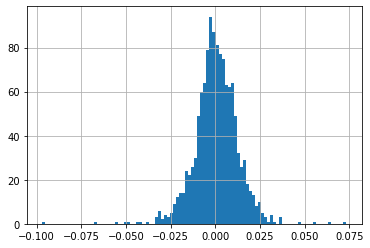

In [13]:
# histogram of log returns
sbux['log_return'].hist(bins=100)
plt.show()

In [14]:
# recalc  statistics on our log returns - sample mean and var
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

## Normal Distribution

In [15]:
# imports
from scipy.stats import norm
from scipy.stats import probplot
import statsmodels.api as sm

In [16]:
# create comparison between histograms of our data and a normal dist

# x list is based on min and max returns observed
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
# y list is from the normal dist, with mean and stdev equal to that of our sample returns
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

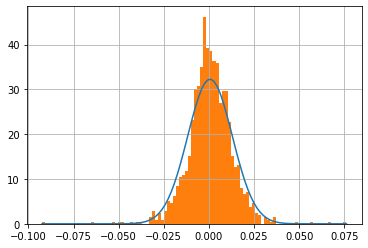

In [17]:
# create plot to compare the two
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
plt.show()

Not a great fit to the normal distribution.  Let's confirm with QQ-Plot.

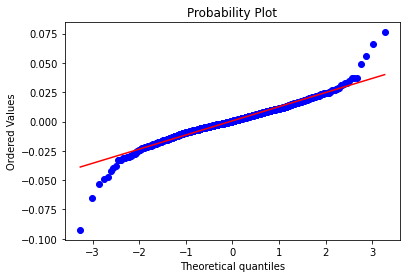

In [18]:
# create QQ-plot
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)
plt.show()

Significant divergence at the ends of the plot.  Again, not a great fit to normal.

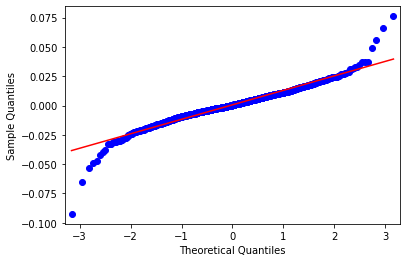

In [19]:
# create the QQ-plot using statsmodels
sm.qqplot(sbux['return'].dropna(), line='s');

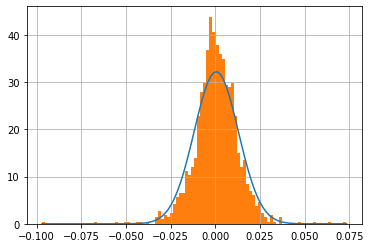

In [20]:
# let's redo the above using the log returns instead
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)
plt.show()

Again, this is not a great fit for log returns either.  This looks almost identical to the previous plot, as log returns and returns are very close.

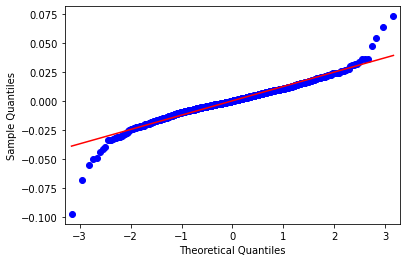

In [21]:
# let's redo the QQ plot too
sm.qqplot(sbux['log_return'].dropna(), line='s');

Again, we see that our distribution has heavier tails than the normal distribution.

## t-Distribution

In [22]:
# imports
from scipy.stats import t # careful not to use t for anything else later

In [23]:
# create x_list for returns again
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [24]:
# fit a t-dist to returns
params = t.fit(sbux['return'].dropna())
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [25]:
# assign the params to degrees of freedom, location, and scale
dof, loc, scale = params

In [26]:
# create y_list from our fitted distribution
y_list = t.pdf(x_list, dof, loc, scale)

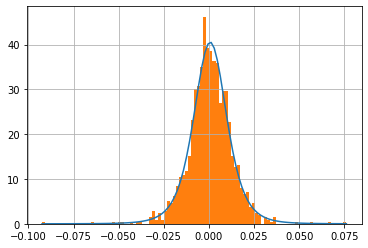

In [27]:
# plot our histogram against the t-dist
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
plt.show()

The t-dist is a much better fit than the normal distribution.

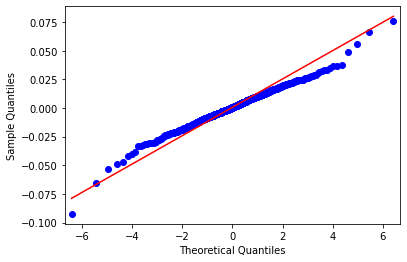

In [28]:
# review the QQ-plot for t-dist
sm.qqplot(sbux['return'].dropna(), dist=t, distargs=(dof,), line='s');

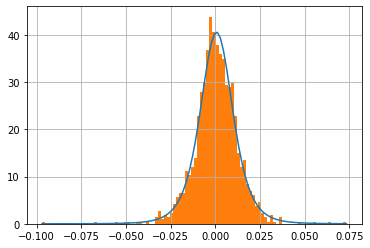

In [29]:
# redo the above for log returns
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
params = t.fit(sbux['log_return'].dropna())
dof, loc, scale = params
y_list = t.pdf(x_list, dof, loc, scale)

plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)
plt.show()

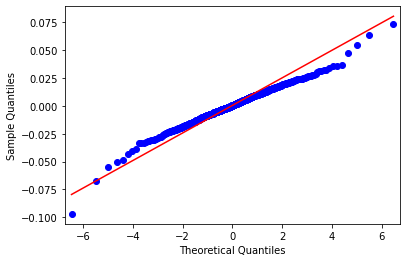

In [30]:
# redo QQ-plot
sm.qqplot(sbux['log_return'].dropna(), dist=t, distargs=(dof,), line='s');

Again we see very little difference between the returns and log returns, and the t-distribution is a much better fit than the normal distribution.

## Skewness and Kurtosis

In [31]:
# calculate skewness
sbux['return'].skew()

-0.2680784195824153

In [32]:
# calculate excess kurtosis
sbux['return'].kurtosis()

5.593158903424731

In [33]:
# calc skewness of log returns
sbux['log_return'].skew()

-0.41015501490182066

In [34]:
# calc excess kurtosis of log returns
sbux['log_return'].kurtosis()

5.964502225799283

The skew in both cases is negative - these returns are somewhat left-tailed meaning more likely to get extreme negative returns.  The excess kurtosis in both cases is almost 6 - these returns have heavier tails than the normal distribution, meaning more likely to get extreme values.

## Confidence Intervals

In [35]:
# get the returns to calculate confidence intervals
values = sbux['return'].dropna().to_numpy()

In [36]:
# calculate the mean and standard deviation
m = values.mean()
s = values.std(ddof=1)

In [37]:
# calculate lower and upper limits of confidence intervals
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

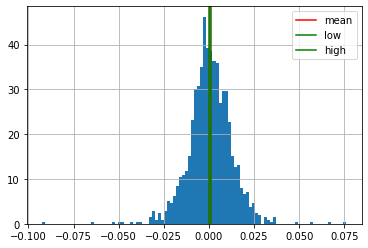

In [38]:
# create a plot
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend();

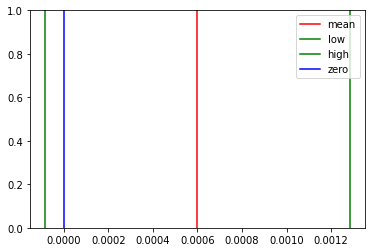

In [39]:
# the lines are hard to see - zoom in to see the interval
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.axvline(0, label='zero', color='blue')
plt.legend();

## Statistical Testing

In [40]:
from scipy.stats import jarque_bera, normaltest

In [41]:
jarque_bera(values)

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

In [42]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [43]:
jarque_bera(sbux['log_return'].dropna())

Jarque_beraResult(statistic=1882.1814629047672, pvalue=0.0)

In [44]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

Note that with all of the above tests, the p-value is very small and we reject the null that the data comes from a normal distribution.

In [45]:
from scipy.stats import kstest

In [46]:
# test if this is a t distribution
df, loc, scale = t.fit(values)
def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

In [47]:
# test if log returns is a t distribution
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575)

We cannot reject the null that the returns or the log returns come from a t distribution based on the komolgorov-smirnov test.

In [49]:
from scipy.stats import ttest_1samp

In [50]:
# test whether the mean of values is 0
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [51]:
# test whether the mean of the log returns is 0
ttest_1samp(sbux['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

We cannot reject the null hypothesis of 0 in either case.

In [52]:
# let's look at another stock besides sbux
mmm = data[data['Name'] == 'MMM'].copy()

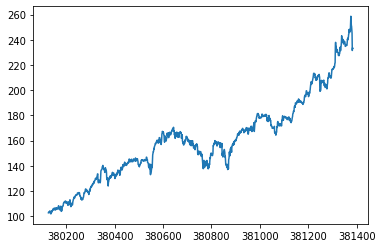

In [53]:
# definitely looks upward trending, right?
mmm['close'].plot();

In [54]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [55]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

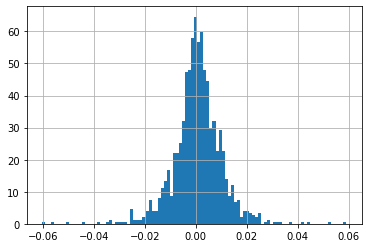

In [57]:
# is this normal?
mmm['return'].hist(bins=100, density=True);

In [58]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


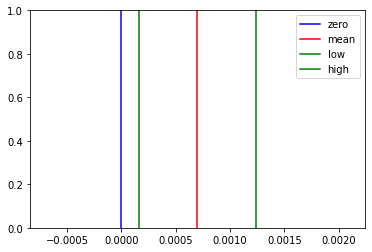

In [59]:
# look at the confidence interval
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue')
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend();

The 95% confidence interval does not include zero.

In [60]:
# confirm tests reject the null that the mean is 0
ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [61]:
# similarly for the log returns
ttest_1samp(mmm['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

## Covariance and Correlation

In [62]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2021-10-19 19:52:59--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  5.10MB/s    in 0.8s    

2021-10-19 19:53:00 (5.10 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [63]:
close = pd.read_csv('sp500_close.csv')

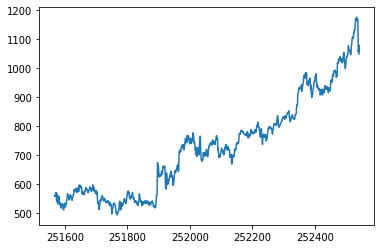

In [64]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot();

In [65]:
len(goog)

975

In [66]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [67]:
# drop non-trading days
sub.dropna(axis=0, how='all', inplace=True)

In [68]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [69]:
# calculate returns for each of our symbols
for symbol in symbols:
    sub[symbol + '_prev'] = sub[symbol].shift(1)
    sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [70]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [71]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


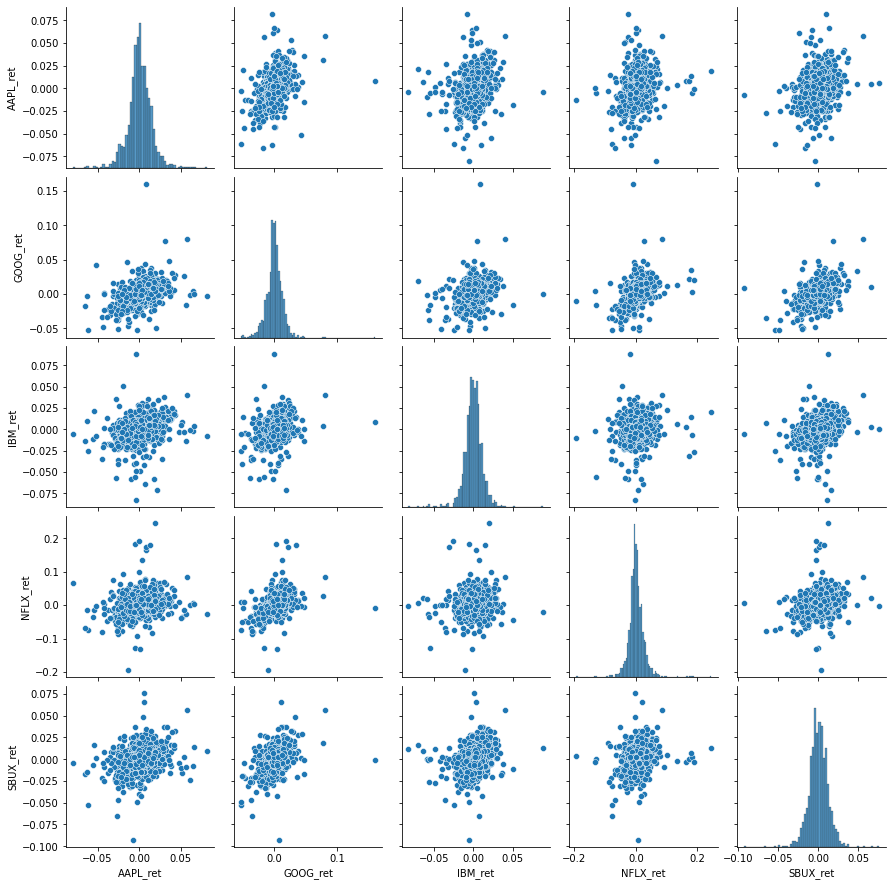

In [73]:
import seaborn as sns
sns.pairplot(rets);

In [74]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [75]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

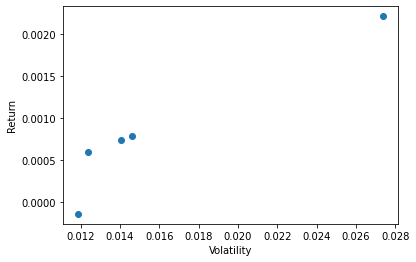

In [76]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return');

In [77]:
# correlation matrix
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [78]:
# covariance matrix
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


## Mixture of Gaussians

In [79]:
x_list = np.linspace(-0.1, 0.1, 500)

In [80]:
# create mixture manually
p = 0.5
fx = p * norm.pdf(x_list, loc=0, scale=0.01) + \
    (1-p) * norm.pdf(x_list, loc=0, scale=0.002)

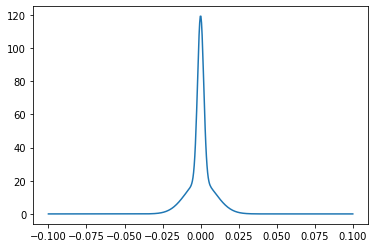

In [81]:
plt.plot(x_list, fx);

In [82]:
# generate samples and calculate sample kurtosis
samples = []
m0, s0 = 0, 0.01
m1, s1 = 0, 0.002
for _ in range(5000):
    if np.random.random() < p:
        x = norm.rvs(m0, s0)
    else:
        x = norm.rvs(m1, s1)
    samples.append(x)
    
series = pd.Series(samples)
series.kurtosis()

2.5340446143391944

In [83]:
# use sklearn GMM
from sklearn.mixture import GaussianMixture

data = sbux['log_return'].dropna().to_numpy().reshape(-1, 1)
# choose number of gaussians to include, here we picked 2 - enough for heavy tails
model = GaussianMixture(n_components=2)
model.fit(data)

weights = model.weights_
means = model.means_
cov = model.covariances_
print("weights: ", weights)
print("means: ", means)
print("variances: ", cov)

weights:  [0.61807517 0.38192483]
means:  [[ 0.00114856]
 [-0.00048781]]
variances:  [[[6.51181870e-05]]

 [[2.96637119e-04]]]


In [84]:
means = means.flatten()
var = cov.flatten()

In [85]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

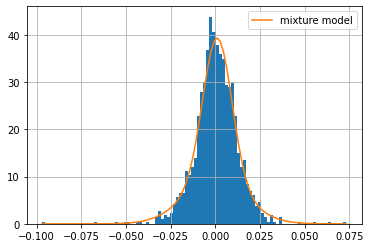

In [87]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend();

## Volatility Clustering

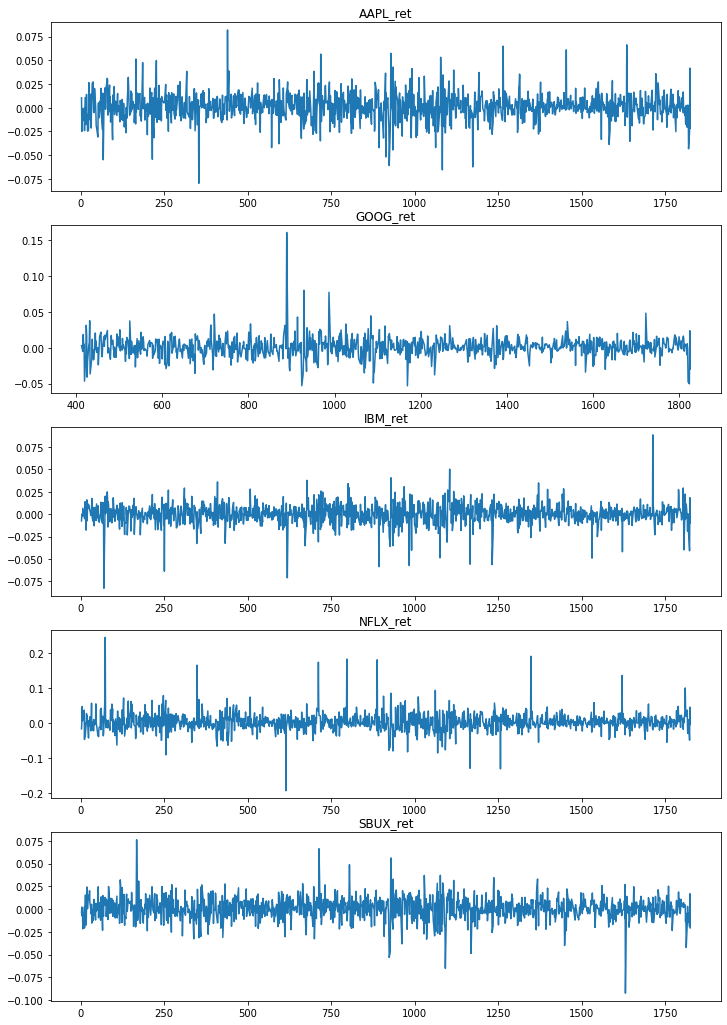

In [88]:
# look at clusters of volatility
for i, symbol in enumerate(rets.columns):
    plt.subplot(len(rets.columns), 1, i + 1)
    plt.title(symbol)
    rets[symbol].plot(figsize=(12,18));

## Price Simulation

In [89]:
# sample from existing returns
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns = sbux['return'].dropna()
for _ in range(100):
    r = np.random.choice(returns)
    p = prices[-1] * (1 + r)
    prices.append(p)

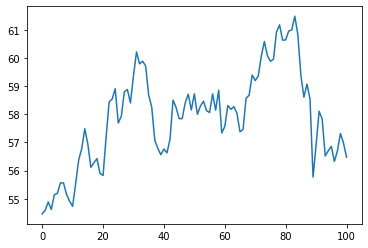

In [90]:
plt.plot(prices);

In [91]:
# fit t distribution to returns and sample from that
df, loc, scale = t.fit(sbux['return'].dropna())
p0 = sbux.iloc[-1]['close']
prices = [p0]
for _ in range(100):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

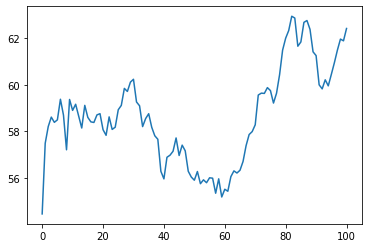

In [92]:
plt.plot(prices);